In [1]:
import pandas as pd

In [2]:
data_path = './dataset/creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
raw_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


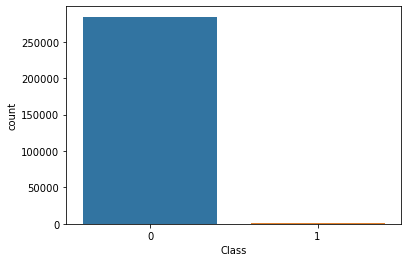

In [5]:
sns.countplot('Class', data=raw_data);

In [6]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [8]:
import numpy as np

In [9]:
np.unique(y_train, return_counts=True)[1][1] / len(y_train) * 100

0.17254870488152324

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score (y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

In [11]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    print('===> Confusion matrix')
    print(confusion)
    print('=================')

    print(('Accuracy : {0: .4f}, Precision: {1: .4f}'.format(acc, pre)))
    print(('Recall: {0: .4f}, F1 : {1: .4f}, AUC : {2: .4f}'.format(re, f1, auc)))

In [12]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

===> Confusion matrix
[[85284    11]
 [   60    88]]
Accuracy :  0.9992, Precision:  0.8889
Recall:  0.5946, F1 :  0.7126, AUC :  0.7972


In [13]:
%%time
from sklearn.tree  import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=5)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

===> Confusion matrix
[[85279    16]
 [   42   106]]
Accuracy :  0.9993, Precision:  0.8689
Recall:  0.7162, F1 :  0.7852, AUC :  0.8580
Wall time: 3.33 s


In [14]:
%%time
from sklearn.ensemble  import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

===> Confusion matrix
[[85290     5]
 [   38   110]]
Accuracy :  0.9995, Precision:  0.9565
Recall:  0.7432, F1 :  0.8365, AUC :  0.8716
Wall time: 20.1 s


In [15]:
%%time
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=100, num_leaves=64, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

===> Confusion matrix
[[85286     9]
 [   36   112]]
Accuracy :  0.9995, Precision:  0.9256
Recall:  0.7568, F1 :  0.8327, AUC :  0.8783
Wall time: 1.01 s


In [16]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [17]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names= ['Accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [18]:
%%time
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

Wall time: 29.4 s


In [19]:
result

,Accuracy,precision,recall,f1,roc_auc
LinearRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999321,0.868852,0.716216,0.785185,0.858014
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999473,0.925620,0.756757,0.832714,0.878326


C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


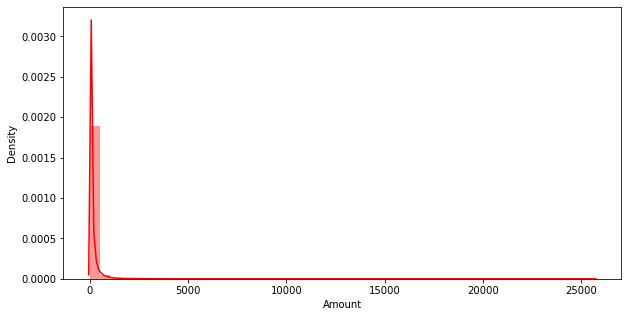

In [20]:
plt.figure(figsize=(10, 5))
sns.distplot(raw_data['Amount'], color="r");

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data["Amount"].values.reshape(-1,1))

In [22]:
raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [23]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

In [24]:
%%time
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

Wall time: 25.5 s


,Accuracy,precision,recall,f1,roc_auc
LinearRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999321,0.868852,0.716216,0.785185,0.858014
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999497,0.941176,0.756757,0.838951,0.878337


In [25]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
    
    plt.plot([0,1],[0,1], 'k--', label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

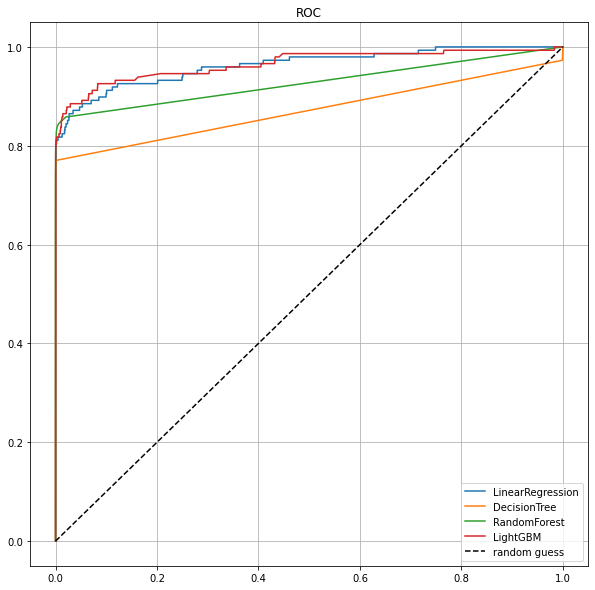

In [26]:
draw_roc_curve(models, model_names, X_test, y_test)

C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

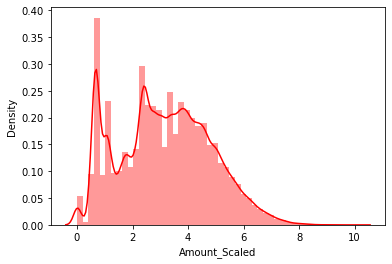

In [27]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log

sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

In [28]:
%%time
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

Wall time: 25.8 s


,Accuracy,precision,recall,f1,roc_auc
LinearRegression,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999321,0.868852,0.716216,0.785185,0.858014
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999473,0.925620,0.756757,0.832714,0.878326


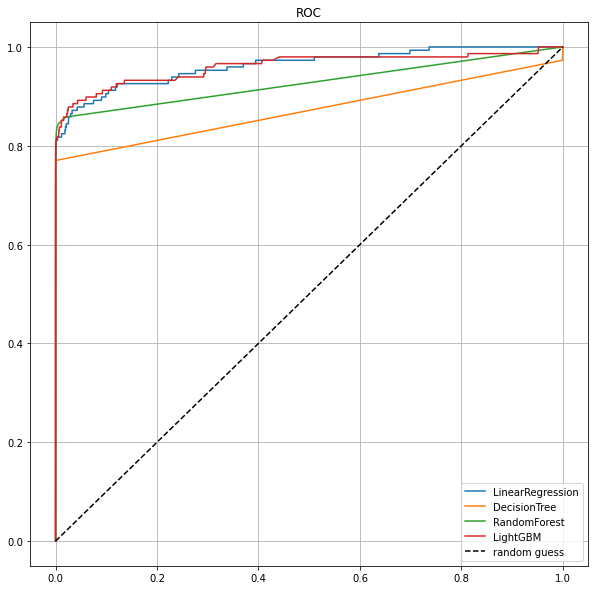

In [29]:
draw_roc_curve(models, model_names, X_test, y_test)

In [30]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class'] == 1][column]

    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight

    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index


In [31]:
get_outlier(df=raw_data, column='V14')

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [32]:
outlier_index = get_outlier(df=raw_data, column='V14')
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

In [33]:
X = raw_data_copy
raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [34]:
%%time
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

Wall time: 29.1 s


,Accuracy,precision,recall,f1,roc_auc
LinearRegression,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999508,0.900000,0.801370,0.847826,0.900609
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999544,0.928000,0.794521,0.856089,0.897208


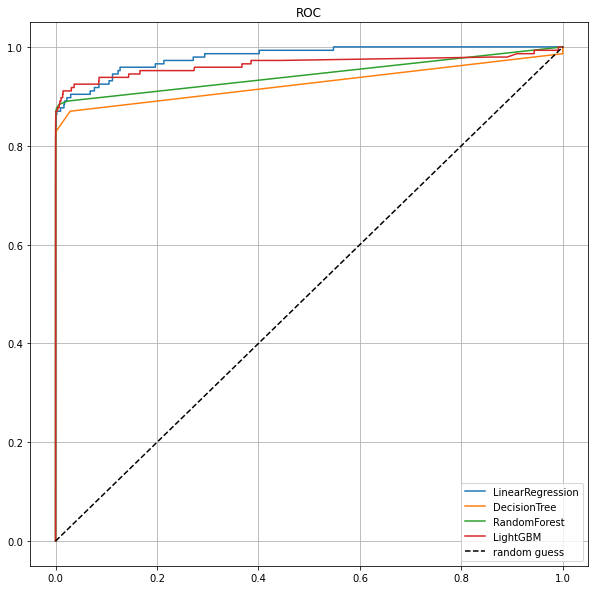

In [35]:
draw_roc_curve(models, model_names, X_test, y_test)

In [36]:
!pip install imbalanced-learn

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [38]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [39]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [40]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [41]:
%%time
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

result

Wall time: 49.8 s


,Accuracy,precision,recall,f1,roc_auc
LinearRegression,0.975609,0.059545,0.897260,0.111679,0.936502
DecisionTree,0.963144,0.039841,0.890411,0.076269,0.926840
RandomForest,0.999532,0.873239,0.849315,0.861111,0.924552
LightGBM,0.999286,0.774194,0.821918,0.797342,0.910754
